# Notebook 7.B - Summary Classification: A more difficult dataset

## 7.B.1 Load CIFAR-10 Data Set

**Description:** A dataset of 60,000 color images ($32 \times 32$ pixels) in 10 classes (e.g., airplane, car, bird, cat, deer, dog, frog, horse, ship, truck).

CIFAR-10 is harder than MNIST because the images are colored and contain more complex patterns and noise. Regression would struggle due to the non-linear structure and high-dimensional data, but CNNs can effectively handle spatial patterns. It is slightly more computationally demanding than MNIST due to the additional complexity of RGB channels.

**Task:**

As a first step, you only have to go through the next steps and inspect the data set.

In [1]:
import tensorflow as tf

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Convert labels to one-hot encoding if needed
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)


/Users/mschilling/miniforge3/envs/tf_env/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 10)


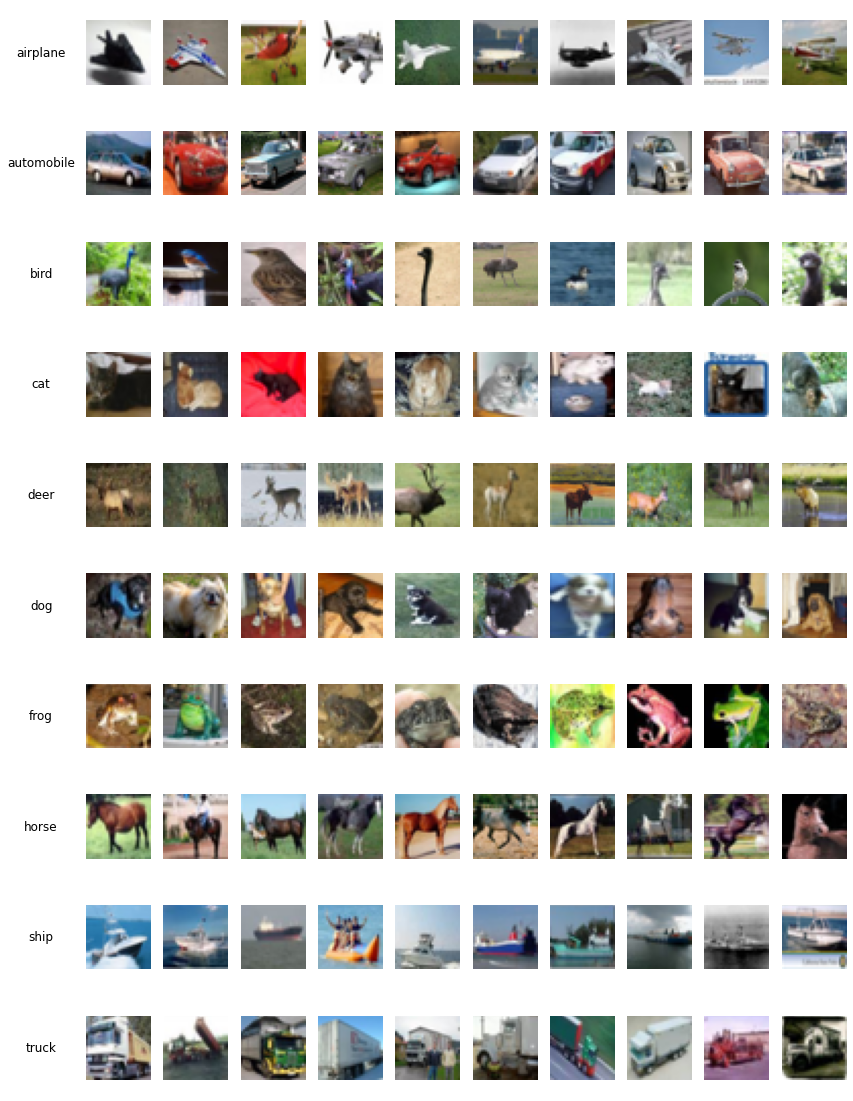

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Group 10 examples per class
examples_per_class = 10
rows = len(class_names)
fig, axes = plt.subplots(rows, examples_per_class + 1, figsize=(15, rows * 2))

# Loop through each class
for class_idx, class_name in enumerate(class_names):
    # Display the class name in the first column
    axes[class_idx, 0].text(
        0.5, 0.5, class_name, ha='center', va='center', fontsize=12
    )
    axes[class_idx, 0].axis("off")  # Turn off the axis for text cells

    # Find indices of the first 10 images for the current class
    class_indices = np.where(np.argmax(y_train, axis=1) == class_idx)[0][:examples_per_class]
    for j, idx in enumerate(class_indices):
        ax = axes[class_idx, j + 1]
        ax.imshow(X_train[idx])
        ax.axis("off")

plt.show()


--- 

## 7.B.2 Applying a Convolutional Neural Network Architecture

We started with the LeNet-5 architecture, a classic CNN architecture designed by Yann LeCun for handwritten digit recognition. LeNet-5 was well-suited for the MNIST dataset and includes several convolutional and pooling layers, followed by fully connected layers. 

* Input Layer: Accepts 28x28 grayscale images as input, with each image normalized to a range of 0–1 (we added padding).
* Convolutional Layer 1: Applies 6 filters of size 5x5 with stride 1 and ReLU activation, producing 6 feature maps. The resulting feature maps have dimensions of 24x24.
* Pooling Layer 1 (Average Pooling): Averages over 2x2 regions, reducing each feature map to a size of 12x12. Pooling reduces the spatial dimensions and adds robustness to small spatial translations.
* Convolutional Layer 2: Applies 16 filters of size 5x5 with stride 1 and ReLU activation, producing 16 feature maps. The resulting feature maps have dimensions of 8x8.
* Pooling Layer 2 (Average Pooling): Another 2x2 average pooling layer, reducing each feature map to a size of 4x4.
* Fully Connected Layers:
   - Fully Connected Layer 1: Flattens the output from the convolutional layers and connects to a fully connected layer with 120 neurons and ReLU activation.
   - Fully Connected Layer 2: Connects to a fully connected layer with 84 neurons and ReLU activation.
* Output Layer: The final layer is a fully connected layer with 10 neurons and softmax activation, used for classification into the 10 digit classes.

Modern convolutional neural network mostly changed towards smaller filters -- but sometimes stacking multiple of these smaller convolutions on top of each other.
A typical block structure in a convolutional NN combines:

* Convolutional Layer: Applies $32$ filters of size $3 \times 3$ with stride 1 and ReLU activation, producing 32 feature maps (with padding set to `same` which means that the resulting feature map has the same dimensions of $32 \times 32$ as the input).
* Convolutional Layer: Applies $32$ filters of size $3 \times 3$ with stride 1 and ReLU activation
* Pooling Layer (Max Pooling): Takes thes maximum over $2 \times 2$ regions, reducing each feature map to a size by the factor of 2. Pooling reduces the spatial dimensions and adds robustness to small spatial translations.

Multiple of these blocks are stacked and (after flattening) followed by a Dense layer and an output layer (with softmax activation for classification).

Such an approach performs quite well for the given task: We can reach a **validation accuracy of around $60 \%$**.

**Tasks:**

You can simply compare the different architectures and effects of your variations:

* increasing training data (for further variations might have to go back to smaller data set again to speed up training)
* using normalization on the input data (gray scale values are encoded from 0 to 255 = scale it into the range $[0,1]$)
* activation function (last week we already used ReLU, but originally LeNet used sigmoid): compare ReLU and sigmoid (on smaller training data set); how does this interacts with normalization?
* adding Dropout as regularization
* using early stopping
* and Batch Normalization

Epoch 1/10
1563/1563 [==============================] - 22s 13ms/step - loss: 1.7419 - accuracy: 0.3551 - val_loss: 1.3648 - val_accuracy: 0.5063
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.3718 - accuracy: 0.5151 - val_loss: 1.1804 - val_accuracy: 0.5802
Epoch 3/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.3479 - accuracy: 0.5575 - val_loss: 1.4791 - val_accuracy: 0.5281
Epoch 4/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.7525 - accuracy: 0.5381 - val_loss: 1.1872 - val_accuracy: 0.6194
Epoch 5/10
1563/1563 [==============================] - 21s 13ms/step - loss: 4.0222 - accuracy: 0.4958 - val_loss: 6.6476 - val_accuracy: 0.5045
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 12.7262 - accuracy: 0.4937 - val_loss: 13.4061 - val_accuracy: 0.5597
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 59.4832 - accuracy: 0.5120 - val_loss: 151.6

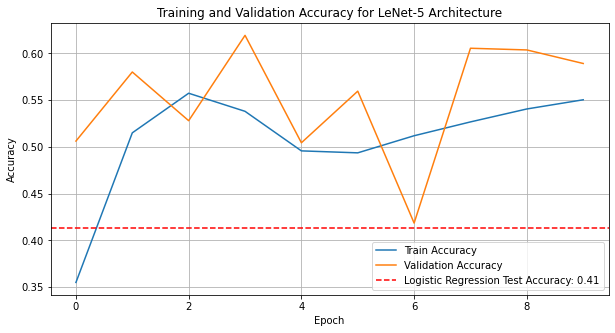

Test Accuracy: 0.5893


In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the LeNet-5 architecture
model_lenet5 = tf.keras.models.Sequential([
    # Convolutional Layer 1: 6 filters of size 5x5, stride 1, with ReLU activation
    # TODO: activation can be replaced with 'relu' instead of 'sigmoid'
    tf.keras.layers.Conv2D(6, kernel_size=(5, 5), strides=1, activation='sigmoid', input_shape=(32, 32, 3), padding='same'),
    # TODO: Batch normalization - remove the single line for Conv2D and replace it by the three following steps
    #tf.keras.layers.Conv2D(6, kernel_size=(5, 5), strides=1, input_shape=(28, 28, 1)),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Activation('relu'),
    # Average Pooling Layer 1: pool size 2x2
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2),
    # Convolutional Layer 2: 16 filters of size 5x5, stride 1, with ReLU activation
    tf.keras.layers.Conv2D(16, kernel_size=(5, 5), strides=1, activation='sigmoid', padding='same'),
    # TODO: Batch normalization - remove the single line for Conv2D and replace it by the three following steps
    #tf.keras.layers.Conv2D(6, kernel_size=(5, 5), strides=1),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Activation('relu'),
    # Average Pooling Layer 2: pool size 2x2
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2),
    # Flatten layer to reshape 2D feature maps to a 1D vector
    tf.keras.layers.Flatten(),
    # Fully Connected Layer 1: 120 units with ReLU activation
    tf.keras.layers.Dense(120, activation='sigmoid'),
    # TODO: Batch normalization - remove the single line for Dense and replace it by the three following steps
    #tf.keras.layers.Dense(120),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Activation('relu'),
    # TODO: Dropout
    #tf.keras.layers.Dropout(0.5),
    # Fully Connected Layer 2: 84 units with ReLU activation
    tf.keras.layers.Dense(84, activation='sigmoid'),
    # TODO: Batch normalization - remove the single line for Dense and replace it by the three following steps
    #tf.keras.layers.Dense(84),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Activation('relu'),
    # TODO: Dropout
    #tf.keras.layers.Dropout(0.5),
    # Output Layer: 10 units with softmax activation for classification
    tf.keras.layers.Dense(10, activation='softmax')
    # Originally used Radial Basis Functions in LeNet-5
])

# Define the CNN model
model = tf.keras.models.Sequential([
    # Convolutional Block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Convolutional Block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Convolutional Block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Fully Connected Layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',    # Metric to monitor (e.g., validation loss)
    patience=5,            # Number of epochs with no improvement to stop training
    restore_best_weights=True  # Restore model weights from the epoch with the best metric value
)

# Create the Adam optimizer with a specific learning rate
adam_optimizer = Adam()  # Set your desired learning rate (default is 0.001, learning_rate is a parameter you can set)

# Compile the model
model_lenet5.compile(optimizer=adam_optimizer,
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])
model.compile(optimizer=adam_optimizer,
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Train the model
history_lenet5 = model.fit(X_train, y_train,
                                  epochs=10,
                                  batch_size=32,
                                  validation_data=(X_test, y_test),
# TODO: Test the early stopping callback
#                                  callbacks=[early_stopping],
                                  verbose=1)

# For comparison: This was the accuracy after 20 iterations using logistic regression 
# (we tested earlier and seemed already converged; in a second run for 100 iterations it reached 0.4032 on the test set)
logistic_regression_accuracy = 0.4138

# Plot the learning curves
plt.figure(figsize=(10, 5))
plt.plot(history_lenet5.history['accuracy'], label='Train Accuracy')
plt.plot(history_lenet5.history['val_accuracy'], label='Validation Accuracy')
# Add the logistic regression test accuracy as a horizontal line
plt.axhline(y=logistic_regression_accuracy, color='red', linestyle='--', label=f'Logistic Regression Test Accuracy: {logistic_regression_accuracy:.2f}')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")


In [13]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


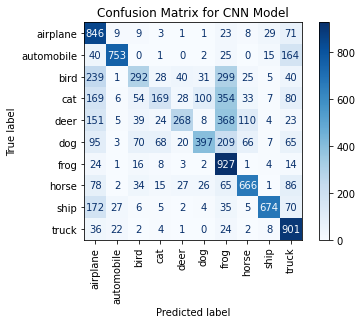

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Convert predictions from probabilities to class indices
predicted_classes = np.argmax(predictions, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), predicted_classes)

# Display the confusion matrix with class names
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Confusion Matrix for CNN Model")
plt.show()


## Remarks on different topics / Explanation

### Normalization
Normalization scales input features to a common range, typically [0, 1] or [-1, 1], ensuring that each feature contributes equally to the model's training. It is especially critical when using activation functions like sigmoid or tanh, which are sensitive to input magnitude and can saturate, leading to vanishing gradients. With ReLU, normalization becomes less critical because ReLU does not saturate for positive inputs. However, normalized inputs still help by improving convergence speed and ensuring consistent gradient magnitudes across layers.

### Effect of More Data
Adding more data can significantly improve model performance, especially by reducing overfitting and enhancing generalization. Models trained on larger datasets can better capture the underlying patterns and variability of the data, leading to improved predictions on unseen samples. However, simply adding more data without diversity or relevance may not yield benefits. High-quality, diverse data ensures that the model is exposed to a wide range of scenarios during training, boosting its ability to generalize.

### Dropout and Regularization
Dropout is a popular regularization technique that prevents overfitting by randomly setting a fraction of neurons to zero during training. This forces the network to learn more robust features, as it cannot rely on any single neuron. Dropout complements other regularization techniques, such as L2 regularization, which penalizes large weights to reduce model complexity. While dropout is effective, using it excessively can lead to underfitting, so it should be applied judiciously, especially in conjunction with Batch Normalization.

### Early Stopping
Early stopping halts training when the model's performance on a validation set stops improving for a specified number of epochs. This prevents overfitting, as the model stops learning patterns specific to the training data. By restoring the weights from the epoch with the best validation performance, early stopping ensures optimal generalization. It is particularly effective in scenarios where the model is prone to overfitting or when computational resources are limited.

### Batch Normalization
Batch Normalization (BatchNorm) normalizes the activations of each layer by adjusting and scaling them during training. This stabilizes learning, reduces the risk of vanishing or exploding gradients, and allows for higher learning rates. BatchNorm also acts as a form of regularization, reducing the need for other techniques like dropout. It is especially useful in deeper networks, where it accelerates convergence and makes the model more robust to weight initialization and learning rate choices.


In [15]:
def plot_image(i, predictions_array, true_array, img):
  true_label, img = np.argmax(true_array[i]), img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_array):
  true_label = np.argmax(true_array[i])
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

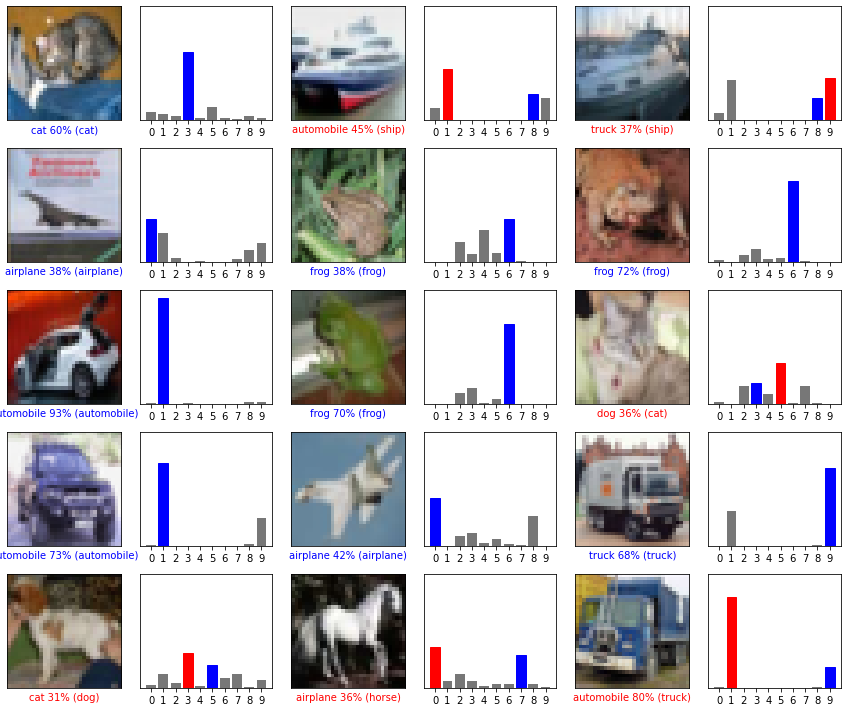

In [17]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()


---

## 7.3 Logistic Regression as a baseline

The CIFAR-10 dataset is a more difficult task. We want to get a first impression how difficult it actually is and simply apply logistic regression on this dataset as a baseline (this can take some time, in the range of minutes). And afterwards compute the confusion matrix.

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Flatten the images for logistic regression
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Shape (50000, 3072)
X_test_flat = X_test.reshape(X_test.shape[0], -1)     # Shape (10000, 3072)

# Train logistic regression
logistic_regression = LogisticRegression(
    max_iter=20,  # Increase iterations for convergence
    multi_class='multinomial',
    solver='saga',
    random_state=42
)
logistic_regression.fit(X_train_flat, y_train.argmax(axis=1))

# Predict on the test set
y_pred = logistic_regression.predict(X_test_flat)

# Calculate and print the test accuracy
test_accuracy = accuracy_score(y_test.argmax(axis=1), y_pred)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.4138


/Users/mschilling/miniforge3/envs/tf_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred)

# Display the confusion matrix with class names
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


<div style="text-align: right;">
<i>This notebook has been created with the help of ChatGPT-4, 14.11.2024; Explanations were initially generated and afterwards edited;</i>
</div>